In [1]:
from Color_functions import *
from skimage import io
from skimage.color import rgb2lab
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
plt.gray()

<Figure size 640x480 with 0 Axes>

In [3]:
rgb_img = io.imread("imagenes/images_prepped_train/img(500).jpg").astype(np.float32)  /255
lab_img = rgb2lab(rgb_img)

In [4]:
prob_la = np.load("prob_la.npy")
prob_lb = np.load("prob_lb.npy")
prob_ab = np.load("prob_ab.npy")

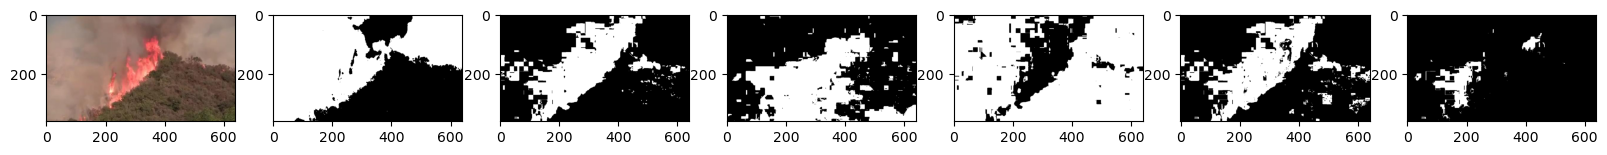

In [5]:
fig, axes = plt.subplots(1,7, figsize=(20, 10))

R1, R2, R3, R4, R5 = mascaras(lab_img, prob_la, prob_lb, prob_ab, 0.0016)

axes[0].imshow(rgb_img)
axes[1].imshow(R1)
axes[2].imshow(R2)
axes[3].imshow(R3)
axes[4].imshow(R4)
axes[5].imshow(R5)
axes[6].imshow(R1 & R2 & R3 & R4 & R5)

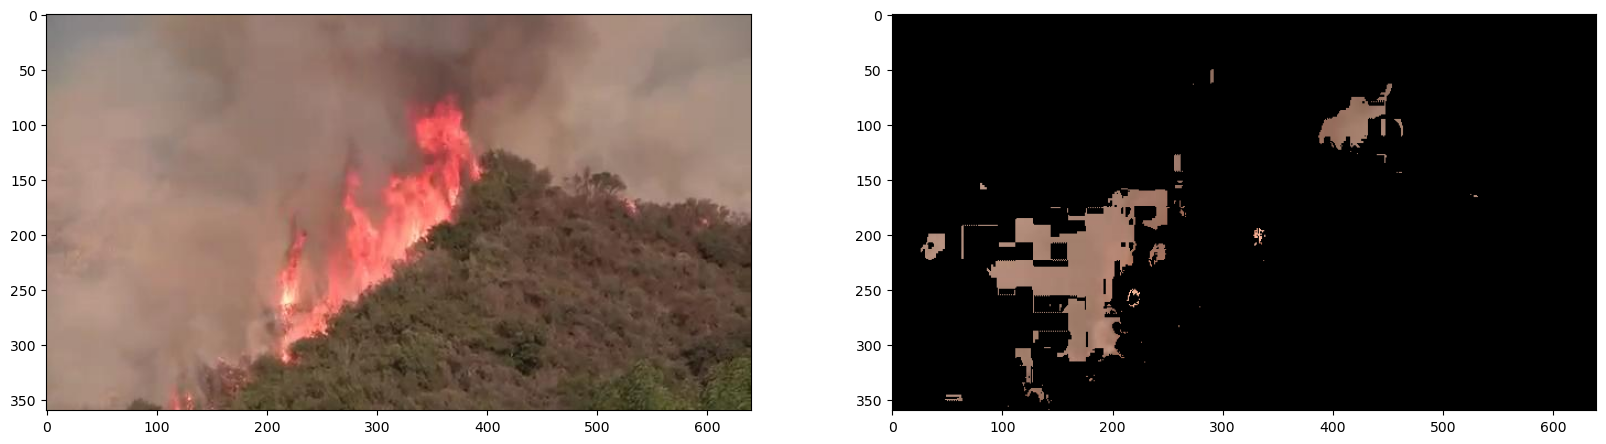

In [6]:
fig, axes = plt.subplots(1,2, figsize=(20, 10))

axes[0].imshow(rgb_img)
axes[1].imshow(rgb_img * (R1 & R2 & R3 & R4 & R5)[...,None])

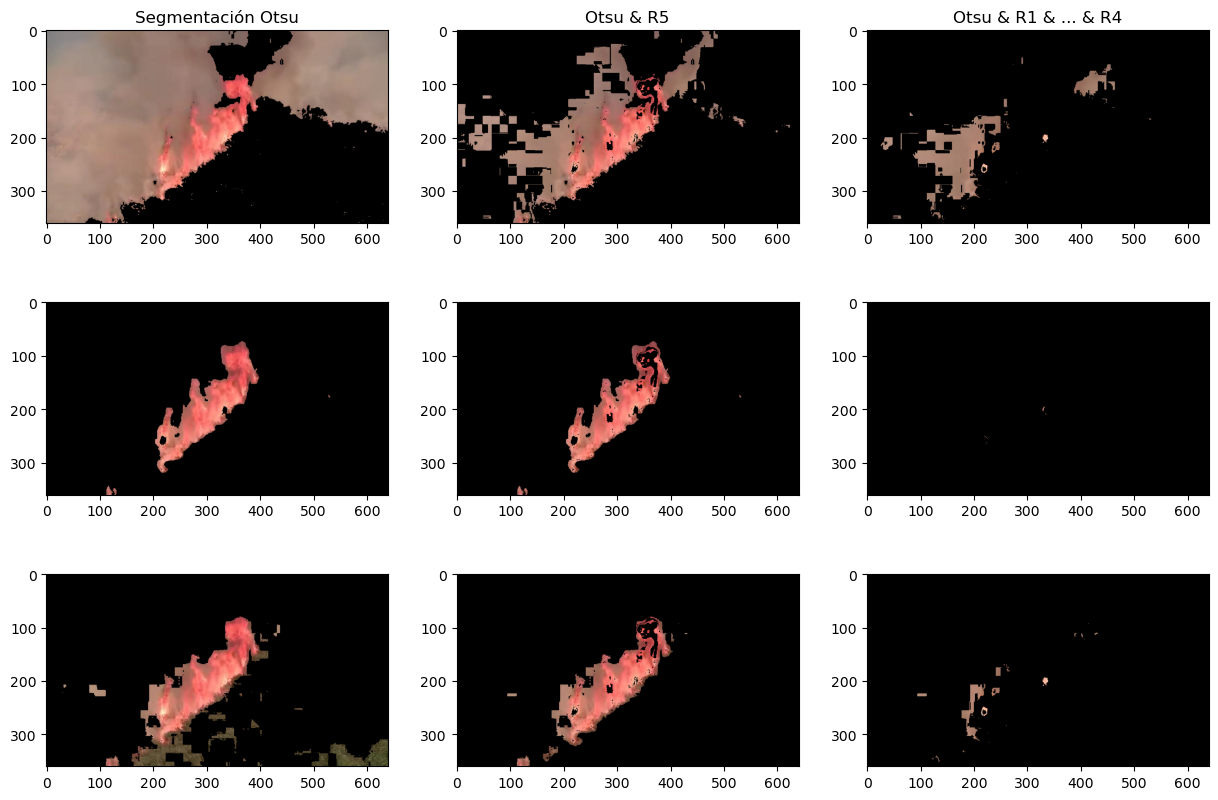

In [7]:
fig, axes = plt.subplots(3,3, figsize=(15,10))

R1a4 = R1&R2&R3&R4
for i in range(3):
    _, S2 = otsu_simple(lab_img[:,:,i])
    axes[i][1].imshow(rgb_img * (R5 & S2)[...,None])
    
    axes[i][2].imshow(rgb_img * (R1a4 & S2)[...,None])

    _, m = otsu_simple(lab_img[:,:,i])
    axes[i][0].imshow(rgb_img * m[...,None])

axes[0][0].set_title("Segmentación Otsu")
axes[0][1].set_title("Otsu & R5")
axes[0][2].set_title("Otsu & R1 & ... & R4");